## Accidentes 

En colombia la cantidad de accidentes de todo tipo se piensa que es bastante elevada, incluidas muertes a causa de los mismos, podriamos pensar que no es importante pero estos accidentes se cobran la vida de
cientos de personas al año, el motivo de este analisis es determinar cuales son los factores mas importantes, el comportamiento de las personas.


### sobre el dataset

en este dataset se encuentras multiples accidentes desde enero de 2010 hasta agosto de 2022
sus causas, el arma o el medio con el cual ocurrio el hecho y por genero, se encuentra la informacion de mas de un millón de casos registrados por la policia nacional extraido de la pagina de datos abiertos colombia

### Que buscamos con este análisis

¿cuantas personas por año, mes y dia tienen accidentes
por departamento y municipio?
¿cuales son los departamentos y munnicipios con la mayor accidentalidad?
¿cuanto ocurre esto al mes, semana y día?
¿los accidentes ocurren mas en hombres o en mujeres?


## import libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm

## Cargamos el dataset Lesiones personales y accidentes de transito de la policia nacional

In [3]:
df = pd.read_csv("C:/Users/Jorge/Downloads/Reporte_Lesiones_Personales_y_en_Accidente_de_Tr_nsito_Polic_a_Nacional.csv", low_memory=False) # importamos el dataset
df

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,2
1,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,LESIONES PERSONALES,1
2,ANTIOQUIA,MUTATÁ,5480000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,LESIONES PERSONALES,1
3,ANTIOQUIA,NECOCLÍ,5490000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,1
4,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,2
...,...,...,...,...,...,...,...,...,...
1047244,CESAR,VALLEDUPAR (CT),20001000,VENENO,3/05/2022,MASCULINO,ADULTOS,LESIONES PERSONALES,1
1047245,HUILA,OPORAPA,41503000,VENENO,16/06/2022,FEMENINO,ADOLESCENTES,LESIONES PERSONALES,1
1047246,TOLIMA,IBAGUÉ (CT),73001000,VENENO,17/04/2022,MASCULINO,ADULTOS,LESIONES PERSONALES,1
1047247,CUNDINAMARCA,COTA,25214000,SIN EMPLEO DE ARMAS,30/03/2022,MASCULINO,ADULTOS,LESIONES PERSONALES,1


### Empezamos a entender el dataset

-Miramos desde que fecha hasta que fecha esta el dataset

-Revisamos cuantas columnas y cuantas filas tiene

-Revisamos la calidad de los datos si existen nulos para saber que hacemos con ellos

-Revisamos el formato que tienen las columnas

In [4]:
#revisar desde que fecha empieza y termina
print(df['FECHA HECHO'].min()) 
print(df['FECHA HECHO'].max())

1/01/2010
9/12/2021


In [5]:
df.describe(include='object')

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA
count,1047249,1047249,1047249,1047249,1047249,1047249,1046285,1047249
unique,32,1023,1250,45,4626,5,5,2
top,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CONTUNDENTES,1/01/2020,MASCULINO,ADULTOS,LESIONES PERSONALES
freq,134439,61226,61226,368472,1346,592363,853564,748540


In [6]:
df.describe()

,CANTIDAD
count,1.047249e+06
mean,1.617188e+00
std,2.163696e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.140000e+02


In [7]:
df.shape

(1047249, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047249 entries, 0 to 1047248
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   DEPARTAMENTO          1047249 non-null  object
 1   MUNICIPIO             1047249 non-null  object
 2   CODIGO DANE           1047249 non-null  object
 3   ARMAS MEDIOS          1047249 non-null  object
 4   FECHA HECHO           1047249 non-null  object
 5   GENERO                1047249 non-null  object
 6   GRUPO ETARIO          1046285 non-null  object
 7   DESCRIPCIÓN CONDUCTA  1047249 non-null  object
 8   CANTIDAD              1047249 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 71.9+ MB


Vemos que en dataset hay pocos nulos lo cual nos dice que no hay que darle mayor preprocesamiento a los datos y la limpieza que le dé dependerá de las inconsistencias que haya en los datos por lo que miraré el dataset más a fondo

## Data Cleaning: Realizaremos la limpieza de los datos

In [9]:
df['GENERO'].drop_duplicates()

0             FEMENINO
1            MASCULINO
109         NO REPORTA
785327    NO REPORTADO
863052               -
Name: GENERO, dtype: object

Empezamos con la columna 'GENERO' que en primer lugar vemos que tiene algunas inconsistencias, vemos que esta en mayúsculas, y hay tres categorias que significan lo mismo que el sexo no lo reportaron por lo que vamos a unificar eso y pasar todo a minúsculas

In [10]:
dict = {'FEMENINO':'femenino',
    'MASCULINO':'masculino',
    'NO REPORTA':'no reporta',
    'NO REPORTADO':'no reporta',
    '-':'no reporta'}

In [11]:
df['GENERO'] = df['GENERO'].replace(dict)

In [12]:
df['GENERO'].drop_duplicates()

0        femenino
1       masculino
109    no reporta
Name: GENERO, dtype: object

Ya puedo observar que ahora tiene menos categorias y todo esta mas unificado por lo que esta mas legible

In [13]:
df['GRUPO ETARIO'].drop_duplicates()

0              ADULTOS
12        ADOLESCENTES
107            MENORES
132858      NO REPORTA
785327    NO REPORTADO
863052             NaN
Name: GRUPO ETARIO, dtype: object

Ahora continuaré con la columna 'GRUPO ETARIO' donde vemos un campo que esta en nulo y algunas inconsistencias por lo que rellenaremos los campos nulos con 'NO REPORTA' y procederé conunificar esos campos y tranformarlos a minúsculas

In [14]:
df['GRUPO ETARIO'] = df['GRUPO ETARIO'].fillna('NO REPORTA')

In [15]:
dict_1 = {'ADULTOS':'adultos',
'ADOLESCENTES':'adolescentes',
    'MENORES':'menores',
    'NO REPORTA':'no reporta',
    'NO REPORTADO':'no reporta'}

In [16]:
df['GRUPO ETARIO'] = df['GRUPO ETARIO'].replace(dict_1)

In [17]:
df['GRUPO ETARIO'].drop_duplicates()

0              adultos
12        adolescentes
107            menores
132858      no reporta
Name: GRUPO ETARIO, dtype: object

Transformaré la columna 'FECHA HECHO' a formato to_datetime para poder tener nuestro formato de fecha correctamente, esto me permitirá hacer algunas operaciones con estos datos 

In [18]:
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y')

Procederé a cambiar los nombres de las columnas a minúsculas para tener mayor comodidad a la hora de hacer operaciones además de darle un formato mas limpio

In [19]:
df.columns

Index(['DEPARTAMENTO', 'MUNICIPIO', 'CODIGO DANE', 'ARMAS MEDIOS',
       'FECHA HECHO', 'GENERO', 'GRUPO ETARIO', 'DESCRIPCIÓN CONDUCTA',
       'CANTIDAD'],
      dtype='object')

In [20]:
rename_dict = {'DEPARTAMENTO':'departamento', 'MUNICIPIO': 'municipio', 'ARMAS MEDIOS':'armas_medios',
       'FECHA HECHO':'fecha_hecho', 'DESCRIPCIÓN CONDUCTA':'descripción_conducta',
       'CANTIDAD':'cantidad','GENERO':'genero','GRUPO ETARIO':'grupo_etario'}

In [21]:
df = df.rename(columns=(rename_dict))

In [22]:
df

,departamento,municipio,CODIGO DANE,armas_medios,fecha_hecho,genero,grupo_etario,descripción_conducta,cantidad
0,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,femenino,adultos,LESIONES PERSONALES,2
1,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,masculino,adultos,LESIONES PERSONALES,1
2,ANTIOQUIA,MUTATÁ,5480000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,masculino,adultos,LESIONES PERSONALES,1
3,ANTIOQUIA,NECOCLÍ,5490000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,femenino,adultos,LESIONES PERSONALES,1
4,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,femenino,adultos,LESIONES PERSONALES,2
...,...,...,...,...,...,...,...,...,...
1047244,CESAR,VALLEDUPAR (CT),20001000,VENENO,2022-05-03,masculino,adultos,LESIONES PERSONALES,1
1047245,HUILA,OPORAPA,41503000,VENENO,2022-06-16,femenino,adolescentes,LESIONES PERSONALES,1
1047246,TOLIMA,IBAGUÉ (CT),73001000,VENENO,2022-04-17,masculino,adultos,LESIONES PERSONALES,1
1047247,CUNDINAMARCA,COTA,25214000,SIN EMPLEO DE ARMAS,2022-03-30,masculino,adultos,LESIONES PERSONALES,1


In [23]:
df['armas_medios'].drop_duplicates()

0                ARMA BLANCA / CORTOPUNZANTE
104                            ARMA DE FUEGO
152                             CONTUNDENTES
358                                     MOTO
359                               NO REPORTA
364             POLVORA(FUEGOS PIROTECNICOS)
365                                PUNZANTES
437                                 VEHICULO
554                              COMBUSTIBLE
630                                  JERINGA
832                                    PERRO
1030                               BICICLETA
1116      ARTEFACTO EXPLOSIVO/CARGA DINAMITA
1331                        MINA ANTIPERSONA
2034                      SUSTANCIAS TOXICAS
2249                     SIN EMPLEO DE ARMAS
2288                           AGUA CALIENTE
2647                            ESCOPOLAMINA
2648                              OLLA BOMBA
2782                         GRANADA DE MANO
2784                           PAQUETE BOMBA
2994                            MEDICAMENTOS
3726      

Con la columna 'ARMAS MEDIOS' hay categorias que se repiten y también hay muchas categorias como no reportado diferentes por lo que unificaré esas categorias similares para que sea mas legible

In [24]:
armas_dict = {'ARMA BLANCA / CORTOPUNZANTE':'cortopunzante',
                            'ARMA DE FUEGO':'arma de fuego',
                            'CONTUNDENTES':'contundentes',
                                    'MOTO':'vehiculo',
                               'NO REPORTA':'no reporta',
             'POLVORA(FUEGOS PIROTECNICOS)':'explosivos',
                                'PUNZANTES':'cortopunzante',
                                'VEHICULO':'vehiculo',
                              'COMBUSTIBLE':'combustible',
                                  'JERINGA':'material medico',
                                    'PERRO':'animales',
                               'BICICLETA':'vehiculo',
       'ARTEFACTO EXPLOSIVO/CARGA DINAMITA':'explosivos',
                        'MINA ANTIPERSONA':'explosivos',
                      'SUSTANCIAS TOXICAS':'sustacias tóxicas',
                     'SIN EMPLEO DE ARMAS':'sin armas',
                           'AGUA CALIENTE':'casero',
                            'ESCOPOLAMINA':'sustancias tóxicas',
                              'OLLA BOMBA':'explosivos',
                         'GRANADA DE MANO':'explosivos',
                           'PAQUETE BOMBA':'explosivos',
                            'MEDICAMENTOS':'material medico',
                                  'VENENO':'sustancias tóxicas',
                                'QUIMICOS':'sustancias tóxicas',
                            'CARRO BOMBA':'explosivos',
                                  'GASES':'sustancias tóxicas',
                        'CINTAS/CINTURON':'materiales',
                  'ARTEFACTO INCENDIARIO':'explosivos',
                         'PAPA EXPLOSIVA':'explosivos',
                     'ALIMENTOS VENCIDOS':'sustancias tóxicas',
                       'LICOR ADULTERADO':'sustancias tóxicas',
                                  'ACIDO':'ácido',
                           'ALUCINOGENOS':'sustancias tóxicas',
                              'ALMOHADA':'materiales',
                        'BOLSA PLASTICA':'materiales',
                             'CORTANTES':'cortopunzante',
                              'CUCHILLA':'cortopunzante',
                               'DIRECTA':'materiales',
                         'ARMAS BLANCAS':'cortopunzante',
                     'PRENDAS DE VESTIR':'materiales',
                        'CILINDRO BOMBA':'explosivos',
                                     '-':'no reporta',
                          'NO REPORTADO':'no reporta',
                        'CINTURON BOMBA':'explosivos',
                       'ARMA TRAUMATICA':'contundentes'}

In [25]:
df['armas_medios'] = df['armas_medios'].replace(armas_dict)

In [26]:
df['departamento'].drop_duplicates()

0                ANTIOQUIA
4                ATLÁNTICO
8                  BOLÍVAR
9                   BOYACÁ
12                  CALDAS
18                 CAQUETÁ
20                   CAUCA
24                   CESAR
25                   CHOCÓ
30                 CÓRDOBA
32            CUNDINAMARCA
39                 GUAJIRA
41                GUAVIARE
42                   HUILA
55               MAGDALENA
56                    META
57                  NARIÑO
60                PUTUMAYO
61                 QUINDÍO
67               RISARALDA
70              SAN ANDRÉS
71               SANTANDER
81                   SUCRE
87                  TOLIMA
91                   VALLE
104               AMAZONAS
161                 ARAUCA
209               CASANARE
283     NORTE DE SANTANDER
357                 VAUPÉS
467                GUAINÍA
2440               VICHADA
Name: departamento, dtype: object

En la columna 'departamento' vemos que todas las categorias estan correctas sin inconsistencias pero para estandarizar todo cambiaremos por minúsculas

In [27]:
df['departamento'] = df['departamento'].str.lower()

Procedo con la columna munucipio con la funcion str.lower() transformé todos los valores en minúscula

In [28]:
df['municipio'].drop_duplicates()

0                 GIRARDOTA
2                    MUTATÁ
3                   NECOCLÍ
4         BARRANQUILLA (CT)
6                    GALAPA
                ...        
294521          MEDIO BAUDÓ
313536           SAN RAFAEL
332866           ALTO BAUDÓ
378296           NO REPORTA
515124              MURINDÓ
Name: municipio, Length: 1023, dtype: object

In [29]:
df['municipio'] = df['municipio'].str.lower()

In [30]:
df['descripción_conducta'].drop_duplicates()

0                                 LESIONES PERSONALES
384    LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )
Name: descripción_conducta, dtype: object

Por ultimo tenemos la columna descripción conducta tambien cambiearemos a minúsculas

In [31]:
desc_dict = {'LESIONES PERSONALES':'lesiones personales', 'LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )':'lesiones culposas'}

In [32]:
df['descripción_conducta'] = df['descripción_conducta'].replace(desc_dict)
df['descripción_conducta'].drop_duplicates()

0      lesiones personales
384      lesiones culposas
Name: descripción_conducta, dtype: object

Ahora veo mas consistencia en el dataframe procederé a eliminar la columna CODIGO DANE ya que esa no me proporciona informacion relevante para el análisis

### Eliminamos las columnas innecesarias

In [33]:
df = df.drop(columns=['CODIGO DANE'])
df

,departamento,municipio,armas_medios,fecha_hecho,genero,grupo_etario,descripción_conducta,cantidad
0,antioquia,girardota,cortopunzante,2010-01-01,femenino,adultos,lesiones personales,2
1,antioquia,girardota,cortopunzante,2010-01-01,masculino,adultos,lesiones personales,1
2,antioquia,mutatá,cortopunzante,2010-01-01,masculino,adultos,lesiones personales,1
3,antioquia,necoclí,cortopunzante,2010-01-01,femenino,adultos,lesiones personales,1
4,atlántico,barranquilla (ct),cortopunzante,2010-01-01,femenino,adultos,lesiones personales,2
...,...,...,...,...,...,...,...,...
1047244,cesar,valledupar (ct),sustancias tóxicas,2022-05-03,masculino,adultos,lesiones personales,1
1047245,huila,oporapa,sustancias tóxicas,2022-06-16,femenino,adolescentes,lesiones personales,1
1047246,tolima,ibagué (ct),sustancias tóxicas,2022-04-17,masculino,adultos,lesiones personales,1
1047247,cundinamarca,cota,sin armas,2022-03-30,masculino,adultos,lesiones personales,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047249 entries, 0 to 1047248
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   departamento          1047249 non-null  object        
 1   municipio             1047249 non-null  object        
 2   armas_medios          1047249 non-null  object        
 3   fecha_hecho           1047249 non-null  datetime64[ns]
 4   genero                1047249 non-null  object        
 5   grupo_etario          1047249 non-null  object        
 6   descripción_conducta  1047249 non-null  object        
 7   cantidad              1047249 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 63.9+ MB


Para este punto ya tenemos nuestro dataset mas organizado y estandarizado

# EDA

### Definimos algunas funcionas para crear algunas columnas que nos permita extraer la informacion que necesitamos

Respondiendo la pregunta de los accidentes por mes defino la funcion MES para obtener el resultado, posteriormente graficaré el resultado y veremos como se comportan los accidente de manera mensual con un grafico de lineas

In [35]:
def MES(df):
    """
    Group accidents by month
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `monthly_accidents`: The grouped Series
    """
    
    # YOUR CODE HERE
    df['fecha_hecho'] = pd.to_datetime(df['fecha_hecho'])
    df['mes'] = df["fecha_hecho"].dt.to_period('M')
    monthly_accidents = df.groupby("mes").size()
    return monthly_accidents

Text(0.5, 0, 'Años')

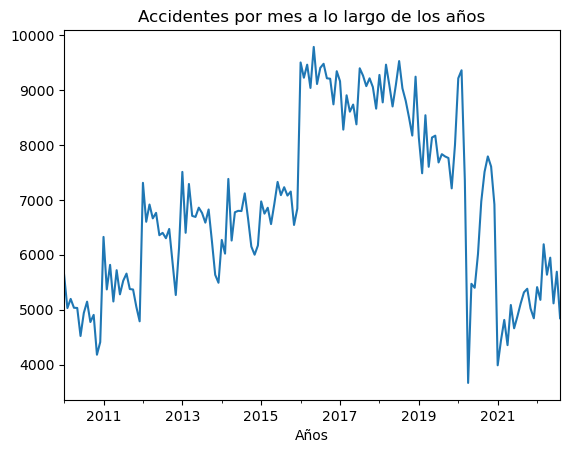

In [36]:
MES(df).plot.line()
plt.title('Accidentes por mes a lo largo de los años')
plt.xlabel('Años')

En el gráfico de lineas para los accidentes por mes se observa que los accidentes venían en general de manera creciente hasta llegar al año 2016 en el cual se dispararon los accidentes en general, luego decrese un poco y para el año 2020 debido a la pandemia bajó sustancialmente el numero de accidentes, aunque despues que empezaron a levantar restricciones creció exponencialmente hasta 2021 y 2022 donde se ha podido observar menos accidentes que años anteriores

### Ahora miraremos como es el comportamiento por dia de la semana

In [37]:
def DIA(df):
    """
    Group accidents by day of the week
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `weekday_accidents`: The grouped Series
    """
    
    # YOUR CODE HERE
    df['dia_semana'] = pd.to_datetime(df['fecha_hecho']).dt.weekday
    weekday_accidents = df.groupby(["dia_semana"]).size()
    return weekday_accidents

Text(0.5, 1.0, 'Accidentes por dia de la semana')

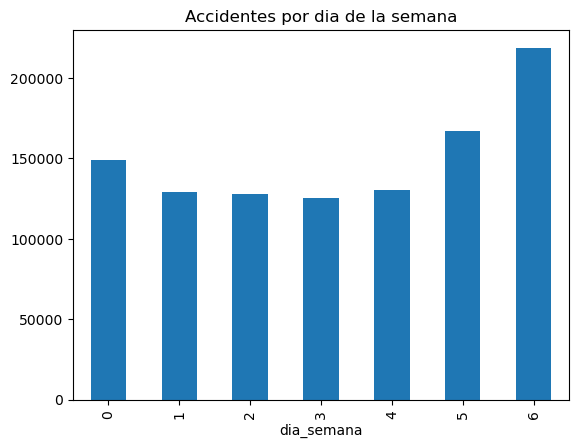

In [38]:
DIA(df).plot.bar()
plt.title('Accidentes por dia de la semana')

En el gráfico de barras se observa como se comportan estos accidentes a lo largo de la semana por los diferentes días partiendo de el lunes donde los accidentes son ligeramente mayores al resto de los dias de la semana donde tienen un comportamiento similar, los fines de semana a partir del sabado donde empieza a crecer y el domingo es donde ocurren la mayor cantidad de accidentes o lesiones personales, por lo tanto podriamos inferir que los fines de semana son los dias de mayor accidentalidad esto podría explicarse debido a los excesos de algunas personas, el abuso de sustancias y todos los peligros que el consumo de esto conlleva, como peleas, conducir en estado de ebriedad, entre muchos otras causas de lesion, siendo esto a considerar mas adelante para determinar las causas reales.

Text(0, 0.5, 'Cantidad (miles)')

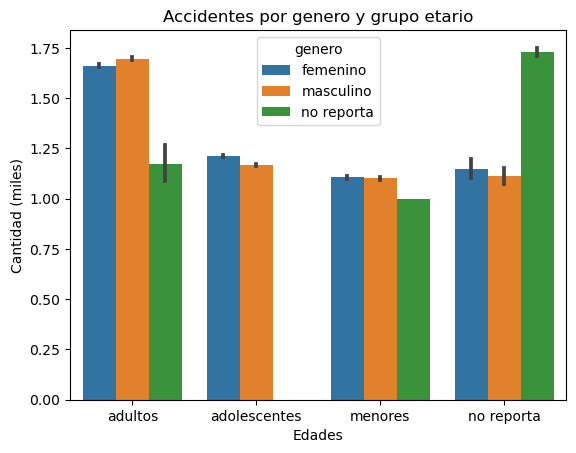

In [39]:
sns.barplot(data=df,x='grupo_etario',y='cantidad',hue='genero')
plt.title('Accidentes por genero y grupo etario')
plt.xlabel('Edades')
plt.ylabel('Cantidad (miles)')

Para obsrvar graficamente como afectaba a la poblacion por genero y grupo etario realicé este grafico de barras que muestra que los accidentes afectan tanto a hombres como a mujeres de maneras muy semejantes siendo los mas afectados el grupo de las personas adultas, entre menores y adolescentes podemos observar que hay poca diferencia en el número de accidentes, y que afecta tanto a niños como a niñas, sin embargo hay muchos accidentes que no se reporta el genero, la edad o ambas cosas, por lo que pueden estar en alguno de estos grupos o generos, sin embargo representa una cantidad de personas importante que han sufrido accidentes de alguna índole.

In [40]:
def DEPARTAMENTO(df):
    """
    Group accidents by borough
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `boroughs`: The grouped Series
    """
    
    # YOUR CODE HERE
    df['departamento'].drop_duplicates()
    boroughs = df.groupby(['departamento']).size()
    return boroughs

<AxesSubplot:xlabel='departamento'>

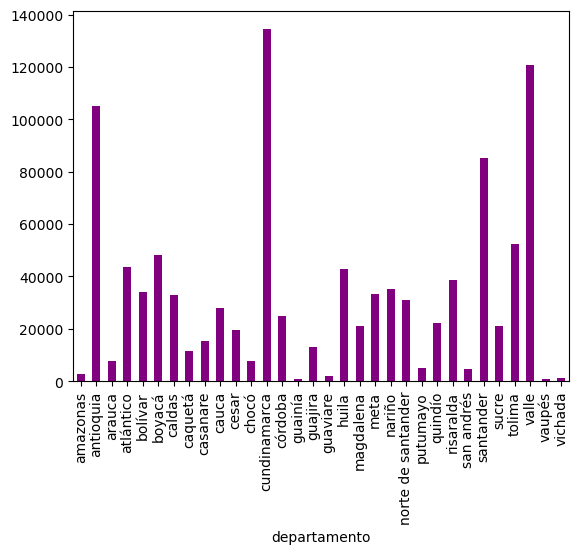

In [41]:
DEPARTAMENTO(df).plot.bar(color='purple')

En la gráfica observamos que los departamentos con mayor accidentalidad son Cundinamarca, Valle, Antioquia, santander y Tolima. Estos son los departamentos con mayor afectación de accidentes en el país

In [42]:
def MUNICIPIO(df):
    """
    Group accidents by borough
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `boroughs`: The grouped Series
    """
    
    # YOUR CODE HERE
    df['municipio'].drop_duplicates()
    boroughs = df.groupby(['municipio']).size()
    boroughs = boroughs.sort_values(ascending=False).head(15)
    return boroughs

<AxesSubplot:xlabel='municipio'>

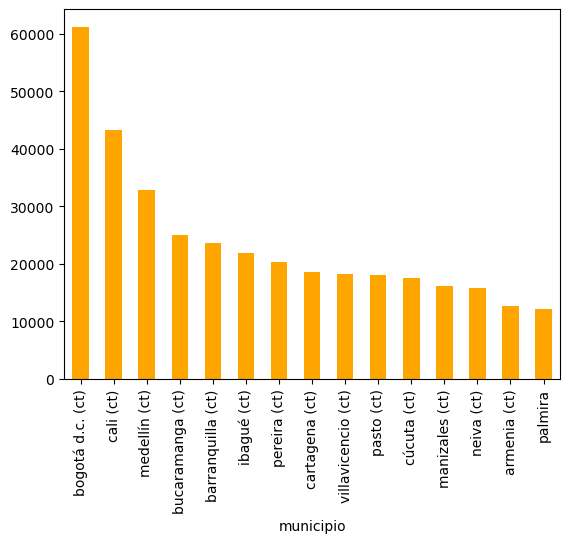

In [43]:
MUNICIPIO(df).plot.bar(color='orange')

Aquí observamos los municipios con mayor accidentalidad en el pais que son Bogotá D.C., Cali y Medellín seguidos de Bucaramanga y Barranquilla.

In [44]:
def MES_DEPAR(df):
    """
    Calculate accidents per hour for each borough
    
    Arguments:
    `df`: A pandas DataFrame
    
    
    Outputs:
    `bor_hour`: A Series. This should be the result of doing groupby by borough
    and hour.
    """
    
    # YOUR CODE HERE
    df['mes'] = pd.to_datetime(df['fecha_hecho']).dt.to_period('M')
    bor_hour= df.groupby(["departamento","mes"]).size()
    
    return bor_hour

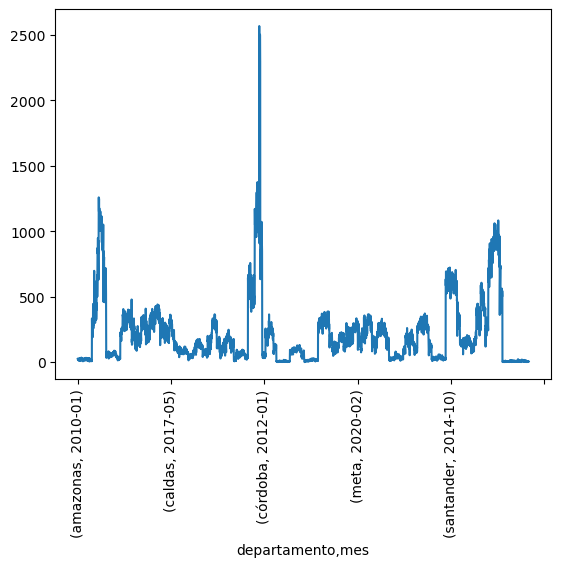

In [45]:
MES_DEPAR(df).plot()
plt.xticks(rotation=90)
plt.show()

In [46]:
def FACTORES(df):
    """
    Finds which 6 factors cause the most accidents, without 
    double counting the contributing factors of a single accident.
    
    Arguments:
    `contrib_df`: A pandas DataFrame.
    
    Outputs:
    `factors_most_acc`: A pandas DataFrame. It has only 6 elements, which are,
    sorted in descending order, the contributing factors with the most accidents.
    The column with the actual numbers is named `index`.    
    """
    
    # YOUR CODE HERE

    contrib_df = pd.melt(df.reset_index(),id_vars ="index", value_vars= 'armas_medios').dropna()
    contrib_df= contrib_df.drop(columns=['variable'])
    contrib_df = contrib_df.drop_duplicates(keep='first')
    factors_most_acc = contrib_df.groupby('value').count().sort_values(by='index', ascending= False)
    factors_most_acc= factors_most_acc.head(10)
    
    return factors_most_acc

<AxesSubplot:xlabel='value'>

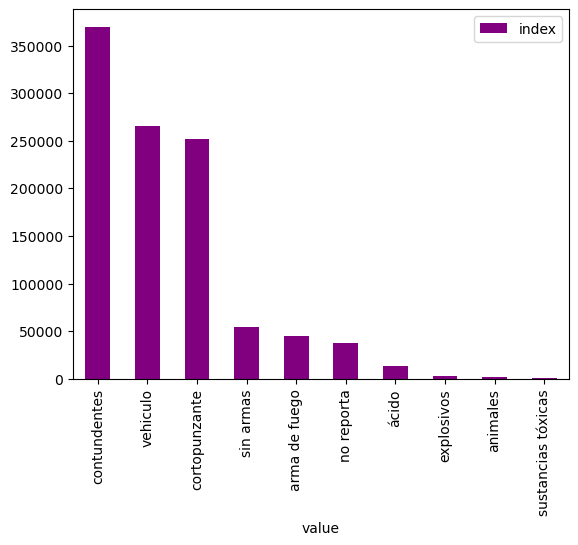

In [47]:
FACTORES(df).plot.bar(color='purple')

Observamos en el gráfico los 10 factores más cmunes de accidentes en colombia vemos que lo que encabeza la lista son objetos contundentes, lo cual podemos inferir que se producen mas lesiones de persona a persona donde una le propicia un golpe con algún arma no cortante, los accidentes vehiculares llevan el segundo puesto seguido de las armas corto punzantes, como machetes, cuchillos, entre otros.

In [48]:
def CONDUCTA(df):
    """
    Finds which 6 factors cause the most accidents, without 
    double counting the contributing factors of a single accident.
    
    Arguments:
    `contrib_df`: A pandas DataFrame.
    
    Outputs:
    `conduct_acc`: A pandas DataFrame. It has only 6 elements, which are,
    sorted in descending order, the contributing factors with the most accidents.
    The column with the actual numbers is named `index`.    
    """
    
    # YOUR CODE HERE

    contrib_df = pd.melt(df.reset_index(),id_vars ="index", value_vars= 'descripción_conducta').dropna()
    contrib_df= contrib_df.drop(columns=['variable'])
    contrib_df = contrib_df.drop_duplicates(keep='first')
    conduct_acc = contrib_df.groupby('value').count().sort_values(by='index', ascending= False)
    
    return conduct_acc

<AxesSubplot:xlabel='value'>

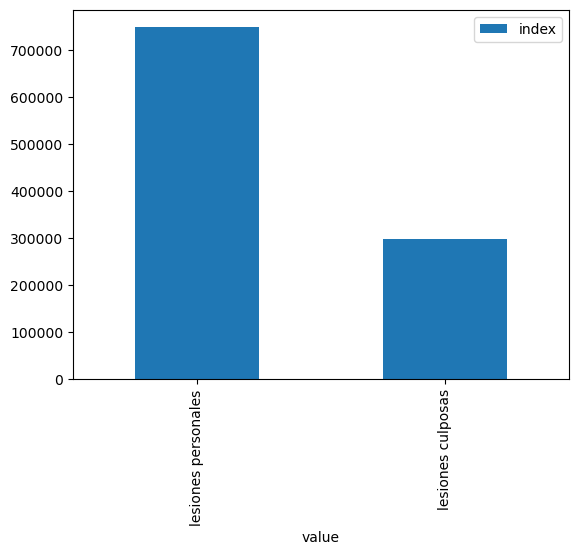

In [49]:
CONDUCTA(df).plot(kind='bar')

Aqui nos damos cuenta de que la mayoria de estos casos son accidentes ya sea provocado por descuido de la persona herida o por otra persona sin tener intencion de causar algun daño, aunque vemos un gran porcentaje de estos siendo causados por otras personas con toda intención de herir o quitar la vida al sujeto o tal vez refleje intentos de suicidio como tal no podemos estar seguros de las causas de estos accidentes por lo que esto es mera especulación.

## Relacion entre las variables y pruebas de hipótesis

La intención de esto es conocer como se relacionan cada variable con respecto a la otra

comenzamos con la relación que hay entre las armas y el departamento, esto con motivo de investigar si algunos de los factores que causan accidentes son mas comunes en un departamento más que en otro

In [50]:
contingency = pd.crosstab(columns=df['armas_medios'],index=df['departamento'])
contingency

armas_medios,animales,arma de fuego,casero,combustible,contundentes,cortopunzante,explosivos,material medico,materiales,no reporta,sin armas,sustacias tóxicas,sustancias tóxicas,vehiculo,ácido
departamento,,,,,,,,,,,,,,,
amazonas,18,57,2,1,1937,453,3,5,8,70,11,3,4,214,93
antioquia,154,4725,33,72,33281,21509,443,22,54,3746,5566,20,156,27497,7827
arauca,7,260,2,7,3104,701,175,0,5,485,667,0,8,2018,244
atlántico,30,2849,45,20,14714,10131,35,20,12,2234,3027,9,50,10461,118
bolívar,2,1165,23,54,10574,8606,31,4,21,1914,3107,0,79,7561,838
boyacá,86,522,18,17,29376,8016,23,16,20,300,698,16,57,8017,931
caldas,69,1142,9,14,12127,7599,33,13,49,593,1453,7,66,9161,404
caquetá,17,737,7,1,5611,1774,133,5,6,180,362,5,11,2377,231
casanare,17,376,5,9,6466,2343,19,3,31,331,1505,5,14,3727,431


<AxesSubplot:xlabel='armas_medios', ylabel='departamento'>

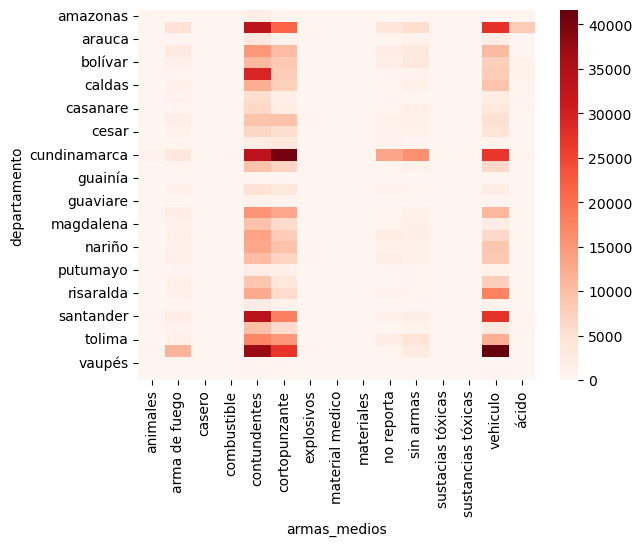

In [51]:
sns.heatmap(contingency, cmap='Reds')

EL gráfico nos revela en la mayoria de los departamentos las causas de accidentes mas frecuentes son las causadas con objetos contundentes o cortopunzante, vemos que en Cundinamarca, Antioquia, Valle y Santander las causas de accidentes o delitos son por objetos contundentes y armas blancas cortopunzantes

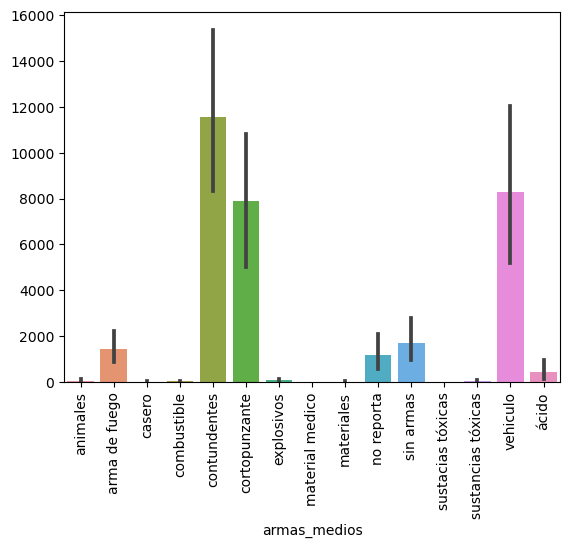

In [52]:
sns.barplot(data=contingency)
plt.xticks(rotation=90)
plt.show()

## Prueba del Chi Cuadrado

realizaremos la prueba del chi cuadrado para determinar si la hipoptesis nula se cumple o no
nuestra hipotesis nula sera determinada como:

-H0 = las variables son independientes.

-H1 = las variables no son independientes.

-si p < 0.025 rechazamos la hipotesis nula.

In [53]:
from scipy.stats import chi2_contingency

In [54]:
p = chi2_contingency(contingency)[1] # obtenemos el valor P

if p <= 0.025:
    label = 'Las variables no son independientes'
else:
    label = 'Las variables son independientes'

print(p,label)

0.0 Las variables no son independientes


Veremos la relación entre los factores de accidentes y el genero de la persona esto con el fin averiguar si hay mas casos entre uno u otro genero

In [55]:
contingency_2 = pd.crosstab(index=df['genero'],columns=df['armas_medios'])
contingency_2

armas_medios,animales,arma de fuego,casero,combustible,contundentes,cortopunzante,explosivos,material medico,materiales,no reporta,sin armas,sustacias tóxicas,sustancias tóxicas,vehiculo,ácido
genero,,,,,,,,,,,,,,,
femenino,904,6927,263,246,161433,89514,672,208,264,17439,17889,147,685,94918,6240
masculino,908,34929,201,336,176053,153848,2169,124,203,20494,25391,96,730,169817,7064
no reporta,216,3726,0,133,31837,9006,163,33,30,359,11197,13,91,333,0


In [56]:
contingency_2.describe()

armas_medios,animales,arma de fuego,casero,combustible,contundentes,cortopunzante,explosivos,material medico,materiales,no reporta,sin armas,sustacias tóxicas,sustancias tóxicas,vehiculo,ácido
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000
mean,676.000000,15194.000000,154.666667,238.333333,123107.666667,84122.666667,1001.333333,121.666667,165.666667,12764.000000,18159.000000,85.333333,502.000000,88356.00000,4434.666667
std,398.376706,17165.787748,137.485757,101.716927,79380.016662,72571.351767,1042.762837,87.523330,121.385062,10851.095567,7100.850935,67.633818,356.646884,84932.33452,3862.569784
min,216.000000,3726.000000,0.000000,133.000000,31837.000000,9006.000000,163.000000,33.000000,30.000000,359.000000,11197.000000,13.000000,91.000000,333.00000,0.000000
25%,560.000000,5326.500000,100.500000,189.500000,96635.000000,49260.000000,417.500000,78.500000,116.500000,8899.000000,14543.000000,54.500000,388.000000,47625.50000,3120.000000
50%,904.000000,6927.000000,201.000000,246.000000,161433.000000,89514.000000,672.000000,124.000000,203.000000,17439.000000,17889.000000,96.000000,685.000000,94918.00000,6240.000000
75%,906.000000,20928.000000,232.000000,291.000000,168743.000000,121681.000000,1420.500000,166.000000,233.500000,18966.500000,21640.000000,121.500000,707.500000,132367.50000,6652.000000
max,908.000000,34929.000000,263.000000,336.000000,176053.000000,153848.000000,2169.000000,208.000000,264.000000,20494.000000,25391.000000,147.000000,730.000000,169817.00000,7064.000000


<AxesSubplot:xlabel='armas_medios', ylabel='genero'>

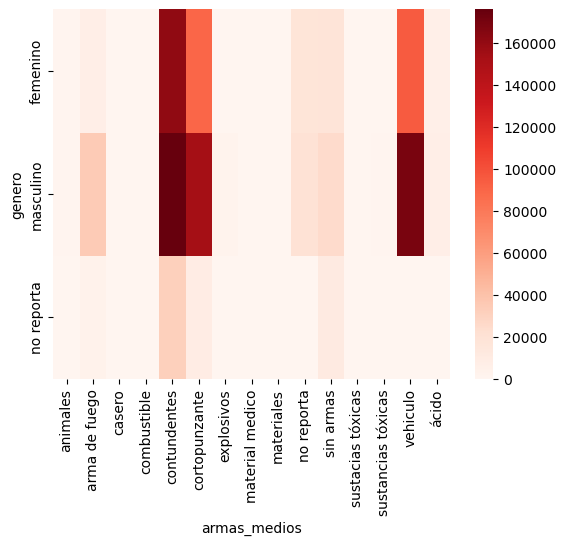

In [57]:
sns.heatmap(contingency_2,cmap='Reds')

In [58]:
p = chi2_contingency(contingency_2)[1] # obtenemos el valor P

if p <= 0.025:
    label = 'Las variables no son independientes'
else:
    label = 'Las variables son independientes'

print(p,label)

0.0 Las variables no son independientes


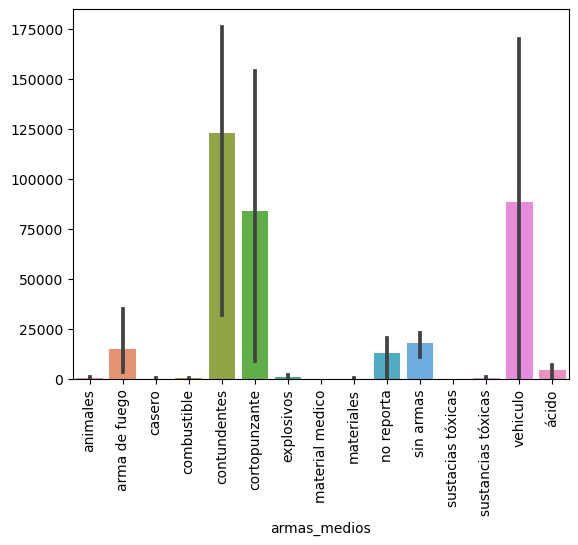

In [59]:
sns.barplot(data=contingency_2)
plt.xticks(rotation=90)
plt.show()

In [60]:
df

,departamento,municipio,armas_medios,fecha_hecho,genero,grupo_etario,descripción_conducta,cantidad,mes,dia_semana
0,antioquia,girardota,cortopunzante,2010-01-01,femenino,adultos,lesiones personales,2,2010-01,4
1,antioquia,girardota,cortopunzante,2010-01-01,masculino,adultos,lesiones personales,1,2010-01,4
2,antioquia,mutatá,cortopunzante,2010-01-01,masculino,adultos,lesiones personales,1,2010-01,4
3,antioquia,necoclí,cortopunzante,2010-01-01,femenino,adultos,lesiones personales,1,2010-01,4
4,atlántico,barranquilla (ct),cortopunzante,2010-01-01,femenino,adultos,lesiones personales,2,2010-01,4
...,...,...,...,...,...,...,...,...,...,...
1047244,cesar,valledupar (ct),sustancias tóxicas,2022-05-03,masculino,adultos,lesiones personales,1,2022-05,1
1047245,huila,oporapa,sustancias tóxicas,2022-06-16,femenino,adolescentes,lesiones personales,1,2022-06,3
1047246,tolima,ibagué (ct),sustancias tóxicas,2022-04-17,masculino,adultos,lesiones personales,1,2022-04,6
1047247,cundinamarca,cota,sin armas,2022-03-30,masculino,adultos,lesiones personales,1,2022-03,2


In [61]:
df = df.set_index('fecha_hecho').reset_index()
df

,fecha_hecho,departamento,municipio,armas_medios,genero,grupo_etario,descripción_conducta,cantidad,mes,dia_semana
0,2010-01-01,antioquia,girardota,cortopunzante,femenino,adultos,lesiones personales,2,2010-01,4
1,2010-01-01,antioquia,girardota,cortopunzante,masculino,adultos,lesiones personales,1,2010-01,4
2,2010-01-01,antioquia,mutatá,cortopunzante,masculino,adultos,lesiones personales,1,2010-01,4
3,2010-01-01,antioquia,necoclí,cortopunzante,femenino,adultos,lesiones personales,1,2010-01,4
4,2010-01-01,atlántico,barranquilla (ct),cortopunzante,femenino,adultos,lesiones personales,2,2010-01,4
...,...,...,...,...,...,...,...,...,...,...
1047244,2022-05-03,cesar,valledupar (ct),sustancias tóxicas,masculino,adultos,lesiones personales,1,2022-05,1
1047245,2022-06-16,huila,oporapa,sustancias tóxicas,femenino,adolescentes,lesiones personales,1,2022-06,3
1047246,2022-04-17,tolima,ibagué (ct),sustancias tóxicas,masculino,adultos,lesiones personales,1,2022-04,6
1047247,2022-03-30,cundinamarca,cota,sin armas,masculino,adultos,lesiones personales,1,2022-03,2


In [62]:
df.to_csv("C:/Users/Jorge/Downloads/Projects/colombian_acc.csv",encoding = 'utf-8')

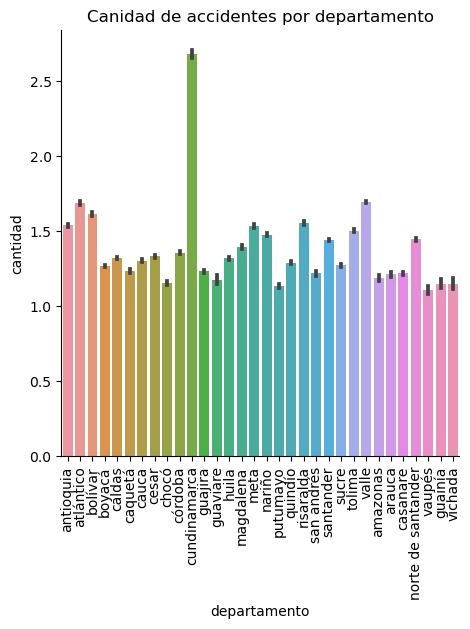

In [63]:
ax = sns.catplot(data=df, x='departamento',y='cantidad',height=5,kind='bar')
plt.title('Canidad de accidentes por departamento')
plt.xticks(rotation=90)
plt.show()

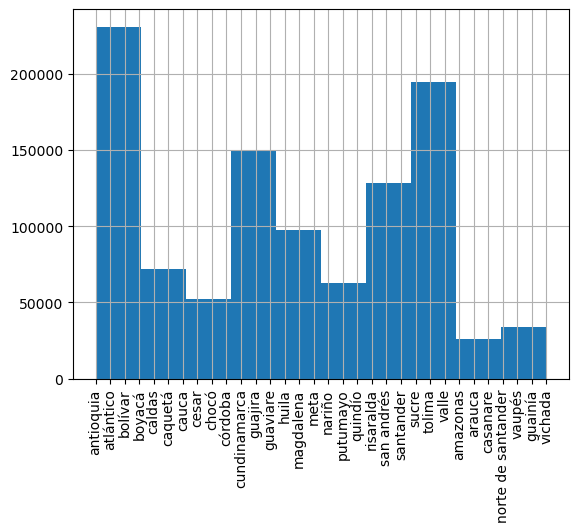

In [64]:
df.departamento.hist()
plt.xticks(rotation=90)
plt.show()

(0.0, 10.0)

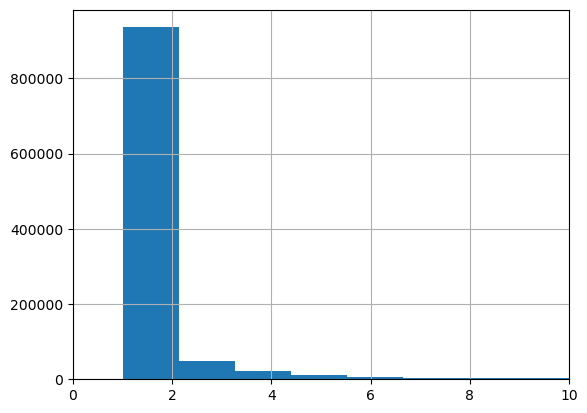

In [65]:
df.cantidad.hist(bins=100)
plt.xlim(0,10)

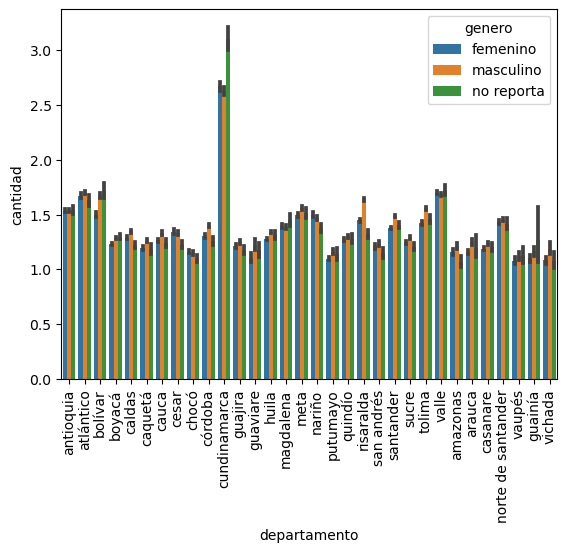

In [66]:
sns.barplot(data=df, x="departamento", y='cantidad',hue="genero")
plt.xticks(rotation=90)
plt.show()

# Preprocesamiento de los datos

In [67]:
from sklearn.decomposition import PCA

In [68]:
X = df.copy()
X = X.drop(columns=['fecha_hecho','mes','dia_semana','departamento','municipio'])

In [69]:
X

,armas_medios,genero,grupo_etario,descripción_conducta,cantidad
0,cortopunzante,femenino,adultos,lesiones personales,2
1,cortopunzante,masculino,adultos,lesiones personales,1
2,cortopunzante,masculino,adultos,lesiones personales,1
3,cortopunzante,femenino,adultos,lesiones personales,1
4,cortopunzante,femenino,adultos,lesiones personales,2
...,...,...,...,...,...
1047244,sustancias tóxicas,masculino,adultos,lesiones personales,1
1047245,sustancias tóxicas,femenino,adolescentes,lesiones personales,1
1047246,sustancias tóxicas,masculino,adultos,lesiones personales,1
1047247,sin armas,masculino,adultos,lesiones personales,1


# KMEANS

Para este dataset he decidido utilizar el algoritmo de KMeans para agruparlos y entender mejor el comportamiento de cada grupo.

In [70]:
import base64
from pylab import rcParams #para el tamaño de los gráficos
from sklearn import preprocessing #librería para aplicar transformaciones a los datos

# librerías de modelos
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [71]:
df1 = df.copy()
df1

,fecha_hecho,departamento,municipio,armas_medios,genero,grupo_etario,descripción_conducta,cantidad,mes,dia_semana
0,2010-01-01,antioquia,girardota,cortopunzante,femenino,adultos,lesiones personales,2,2010-01,4
1,2010-01-01,antioquia,girardota,cortopunzante,masculino,adultos,lesiones personales,1,2010-01,4
2,2010-01-01,antioquia,mutatá,cortopunzante,masculino,adultos,lesiones personales,1,2010-01,4
3,2010-01-01,antioquia,necoclí,cortopunzante,femenino,adultos,lesiones personales,1,2010-01,4
4,2010-01-01,atlántico,barranquilla (ct),cortopunzante,femenino,adultos,lesiones personales,2,2010-01,4
...,...,...,...,...,...,...,...,...,...,...
1047244,2022-05-03,cesar,valledupar (ct),sustancias tóxicas,masculino,adultos,lesiones personales,1,2022-05,1
1047245,2022-06-16,huila,oporapa,sustancias tóxicas,femenino,adolescentes,lesiones personales,1,2022-06,3
1047246,2022-04-17,tolima,ibagué (ct),sustancias tóxicas,masculino,adultos,lesiones personales,1,2022-04,6
1047247,2022-03-30,cundinamarca,cota,sin armas,masculino,adultos,lesiones personales,1,2022-03,2


convertimos las variables categoricas en numericas asignandole un valor a cada uno

In [72]:
CATEGORICAL_COLUMNS = ['departamento', 'municipio' ,'genero','armas_medios','departamento','grupo_etario','fecha_hecho','descripción_conducta']
# iterar con cada columna tipo object y tranformarla en categorica para transformarla a numerica
for column in CATEGORICAL_COLUMNS:
  df1[column] = df1[column].astype('category').cat.codes
  df1[column] = df1[column].astype('float64')

In [73]:
df1

,fecha_hecho,departamento,municipio,armas_medios,genero,grupo_etario,descripción_conducta,cantidad,mes,dia_semana
0,0.0,1.0,350.0,5.0,0.0,1.0,1.0,2,2010-01,4
1,0.0,1.0,350.0,5.0,1.0,1.0,1.0,1,2010-01,4
2,0.0,1.0,545.0,5.0,1.0,1.0,1.0,1,2010-01,4
3,0.0,1.0,552.0,5.0,0.0,1.0,1.0,1,2010-01,4
4,0.0,3.0,83.0,5.0,0.0,1.0,1.0,2,2010-01,4
...,...,...,...,...,...,...,...,...,...,...
1047244,4505.0,10.0,970.0,12.0,1.0,1.0,1.0,1,2022-05,1
1047245,4549.0,17.0,577.0,12.0,0.0,0.0,1.0,1,2022-06,3
1047246,4489.0,28.0,398.0,12.0,1.0,1.0,1.0,1,2022-04,6
1047247,4471.0,12.0,223.0,10.0,1.0,1.0,1.0,1,2022-03,2


Vemos que las columnas cateroricas quedaron en formato float64

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047249 entries, 0 to 1047248
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype    
---  ------                --------------    -----    
 0   fecha_hecho           1047249 non-null  float64  
 1   departamento          1047249 non-null  float64  
 2   municipio             1047249 non-null  float64  
 3   armas_medios          1047249 non-null  float64  
 4   genero                1047249 non-null  float64  
 5   grupo_etario          1047249 non-null  float64  
 6   descripción_conducta  1047249 non-null  float64  
 7   cantidad              1047249 non-null  int64    
 8   mes                   1047249 non-null  period[M]
 9   dia_semana            1047249 non-null  int64    
dtypes: float64(7), int64(2), period[M](1)
memory usage: 79.9 MB


Para este dataset eliminaré las columnas de formato fecha asi como las columnas categoricas como departamento y municipio que tinene demasiados valores únicos y para que ese no afecte el resultado de los clusters

In [75]:
df1 = df1.drop(columns=['fecha_hecho','mes','dia_semana','departamento','municipio','armas_medios'])

Una vez borrado las columnas que no necesitamos procederé a normalizar la data debido a la diferencia de escalas entre una y otra, decidí normalizar porque es mucho mas faci volver a los valores iniciales

In [76]:
train_stats = df1.describe()

train_stats

,genero,grupo_etario,descripción_conducta,cantidad
count,1.047249e+06,1.047249e+06,1.047249e+06,1.047249e+06
mean,6.747555e-01,1.057421e+00,7.147679e-01,1.617188e+00
std,5.732182e-01,5.896843e-01,4.515251e-01,2.163696e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,2.000000e+00,3.000000e+00,1.000000e+00,1.140000e+02


In [77]:
def norm(x):
  return (x - train_stats.loc['mean']) / train_stats.loc['std']
df2 = norm(df1)
df2 = df.drop(columns='fecha_hecho').to_numpy()

In [78]:
df3 = norm(df1)
df3

,genero,grupo_etario,descripción_conducta,cantidad
0,-1.177135,-0.097376,0.631708,0.176925
1,0.567401,-0.097376,0.631708,-0.285247
2,0.567401,-0.097376,0.631708,-0.285247
3,-1.177135,-0.097376,0.631708,-0.285247
4,-1.177135,-0.097376,0.631708,0.176925
...,...,...,...,...
1047244,0.567401,-0.097376,0.631708,-0.285247
1047245,-1.177135,-1.793198,0.631708,-0.285247
1047246,0.567401,-0.097376,0.631708,-0.285247
1047247,0.567401,-0.097376,0.631708,-0.285247


## Elbow Method

I'll find th n_cluster that better fit to the data

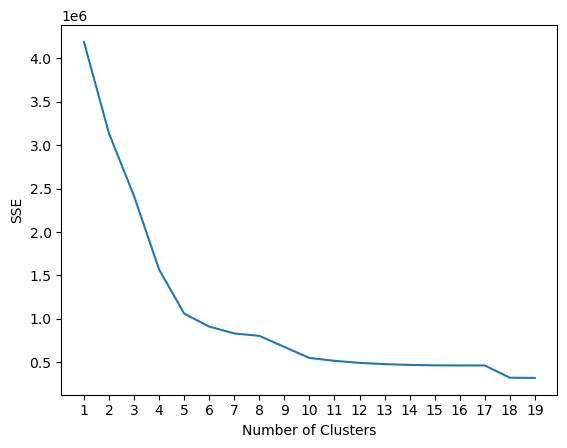

In [79]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df3)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [108]:
%pip install kneed

I use Kneed to detect the optimal cluster to build the model, this method allowed me find out the optimal number of cluster gave me as result 5 cluster as well

In [81]:
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
    x= range(1,20), 
    y=sse,
    S=0.1, curve="convex",
    direction="decreasing", online=True)

K_cost_c3 = cost_knee_c3.elbow
print('Elbow at K =',f'{K_cost_c3:.0f} clusters')

Elbow at K = 5 clusters


## Build the model

bluid the model with the cluster that Kneed gave me as result above

In [82]:
# Construir modelo
from sklearn.cluster import KMeans
km = KMeans(init="k-means++", n_clusters=5, max_iter=10000,n_init=20,algorithm='elkan')
km.fit(df3)

KMeans(algorithm='elkan', max_iter=10000, n_clusters=5, n_init=20)

In [83]:
km.labels_ #clusters

array([4, 0, 0, ..., 0, 0, 0])

In [84]:
km.cluster_centers_ # centroids

array([[ 0.56778376, -0.22392648,  0.63170809, -0.09210064],
       [ 2.27228386,  3.29418055,  0.62957993, -0.0574194 ],
       [-0.06224858, -0.10406233, -1.58300813, -0.05108487],
       [-0.04536952,  0.12988654,  0.3404493 ,  7.44583563],
       [-1.17713547, -0.24600401,  0.63170809, -0.08880333]])

In [85]:
kmeans.predict(X=df3, sample_weight=5)

array([0, 5, 5, ..., 5, 5, 5])

In [86]:
# Create the new data frame with cluster 
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df1.index.values
cluster_map['cluster'] = km.labels_

In [87]:
cluster_map

,data_index,cluster
0,0,4
1,1,0
2,2,0
3,3,4
4,4,4
...,...,...
1047244,1047244,0
1047245,1047245,4
1047246,1047246,0
1047247,1047247,0


In [88]:
groups = pd.concat([df.reset_index(),cluster_map],axis=1) # concatenate this dataframe with the original dataframe to evaluate the results
groups = groups.drop(columns=['data_index','index'])
groups

,fecha_hecho,departamento,municipio,armas_medios,genero,grupo_etario,descripción_conducta,cantidad,mes,dia_semana,cluster
0,2010-01-01,antioquia,girardota,cortopunzante,femenino,adultos,lesiones personales,2,2010-01,4,4
1,2010-01-01,antioquia,girardota,cortopunzante,masculino,adultos,lesiones personales,1,2010-01,4,0
2,2010-01-01,antioquia,mutatá,cortopunzante,masculino,adultos,lesiones personales,1,2010-01,4,0
3,2010-01-01,antioquia,necoclí,cortopunzante,femenino,adultos,lesiones personales,1,2010-01,4,4
4,2010-01-01,atlántico,barranquilla (ct),cortopunzante,femenino,adultos,lesiones personales,2,2010-01,4,4
...,...,...,...,...,...,...,...,...,...,...,...
1047244,2022-05-03,cesar,valledupar (ct),sustancias tóxicas,masculino,adultos,lesiones personales,1,2022-05,1,0
1047245,2022-06-16,huila,oporapa,sustancias tóxicas,femenino,adolescentes,lesiones personales,1,2022-06,3,4
1047246,2022-04-17,tolima,ibagué (ct),sustancias tóxicas,masculino,adultos,lesiones personales,1,2022-04,6,0
1047247,2022-03-30,cundinamarca,cota,sin armas,masculino,adultos,lesiones personales,1,2022-03,2,0


I notice each resukt of the cluster with categorical data

In [89]:
groups[groups.cluster == 0].describe(include='object') # cluster 1

,departamento,municipio,armas_medios,genero,grupo_etario,descripción_conducta
count,396422,396422,396422,396422,396422,396422
unique,32,1022,15,2,3,1
top,cundinamarca,bogotá d.c. (ct),contundentes,masculino,adultos,lesiones personales
freq,48696,22124,173362,396335,348421,396422


In [90]:
groups[groups.cluster == 1].describe(include='object') # cluster 2

,departamento,municipio,armas_medios,genero,grupo_etario,descripción_conducta
count,57237,57237,57237,57237,57237,57237
unique,32,993,14,3,2,2
top,cundinamarca,bogotá d.c. (ct),contundentes,no reporta,no reporta,lesiones personales
freq,9786,2991,31526,56281,57234,57182


In [91]:
groups[groups.cluster == 2].describe(include='object') # cluster 3

,departamento,municipio,armas_medios,genero,grupo_etario,descripción_conducta
count,297235,297235,297235,297235,297235,297235
unique,32,982,7,3,4,1
top,valle,cali (ct),vehiculo,masculino,adultos,lesiones culposas
freq,43421,16703,262171,189897,247844,297235


In [92]:
groups[groups.cluster == 3].describe(include='object') # cluster 4

,departamento,municipio,armas_medios,genero,grupo_etario,descripción_conducta
count,10790,10790,10790,10790,10790,10790
unique,28,149,7,3,4,2
top,cundinamarca,bogotá d.c. (ct),contundentes,masculino,adultos,lesiones personales
freq,8141,8104,4717,5520,10010,9371


In [93]:
groups[groups.cluster == 4].describe(include='object') # cluster 5

,departamento,municipio,armas_medios,genero,grupo_etario,descripción_conducta
count,285565,285565,285565,285565,285565,285565
unique,32,1020,15,1,3,1
top,cundinamarca,bogotá d.c. (ct),contundentes,femenino,adultos,lesiones personales
freq,36358,17056,158892,285565,247289,285565


In [94]:
groups[groups.cluster == 5].describe(include='object') # cluster 6

,departamento,municipio,armas_medios,genero,grupo_etario,descripción_conducta
count,0,0,0,0,0,0
unique,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
groups[groups.cluster == 6].describe(include='object') # cluster 7

,departamento,municipio,armas_medios,genero,grupo_etario,descripción_conducta
count,0,0,0,0,0,0
unique,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN


In the plot bellow notice the cluster 4 got less than the other cluster

<AxesSubplot:>

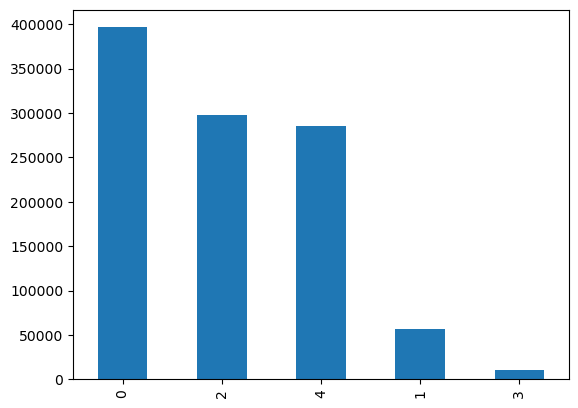

In [96]:
groups['cluster'].value_counts().plot(kind='bar')

In [97]:
def denorm(x):
  return (x * train_stats.loc['std'] + train_stats.loc['mean'])
#df4 = df3.drop(columns='cluster')
df4 = denorm(df3)
df4 = pd.concat([df4,cluster_map],axis=1).drop(columns='data_index')


In [98]:
df4

,genero,grupo_etario,descripción_conducta,cantidad,cluster
0,0.0,1.0,1.0,2.0,4
1,1.0,1.0,1.0,1.0,0
2,1.0,1.0,1.0,1.0,0
3,0.0,1.0,1.0,1.0,4
4,0.0,1.0,1.0,2.0,4
...,...,...,...,...,...
1047244,1.0,1.0,1.0,1.0,0
1047245,0.0,0.0,1.0,1.0,4
1047246,1.0,1.0,1.0,1.0,0
1047247,1.0,1.0,1.0,1.0,0


In [99]:
#groups['cluster'] = km.labels_
#groups.groupby('cluster').agg(['mean','std']).T.plot.bar()

In [100]:
# Inspect the categorical variables
df.select_dtypes('object').nunique()

departamento              32
municipio               1023
armas_medios              15
genero                     3
grupo_etario               4
descripción_conducta       2
dtype: int64

In [101]:
# Check missing value
df.isna().sum()

fecha_hecho             0
departamento            0
municipio               0
armas_medios            0
genero                  0
grupo_etario            0
descripción_conducta    0
cantidad                0
mes                     0
dia_semana              0
dtype: int64

In [102]:
df_region = pd.DataFrame(groups['departamento'].value_counts()).reset_index()

In [103]:
df_region['Percentage'] = df_region['departamento'] / groups['departamento'].value_counts().sum()

In [104]:
df_region.rename(columns = {'index':'departamento', 'departamento':'Total'}, inplace = True)
df_region

,departamento,Total,Percentage
0,cundinamarca,134439,0.128373
1,valle,120891,0.115437
2,antioquia,105105,0.100363
3,santander,85237,0.081391
4,tolima,52423,0.050058
5,boyacá,48113,0.045942
6,atlántico,43755,0.041781
7,huila,42801,0.040870
8,risaralda,38702,0.036956
9,nariño,35336,0.033742


In [105]:
df_region = df_region.sort_values('Total', ascending = False).reset_index(drop = True)

<AxesSubplot:xlabel='departamento'>

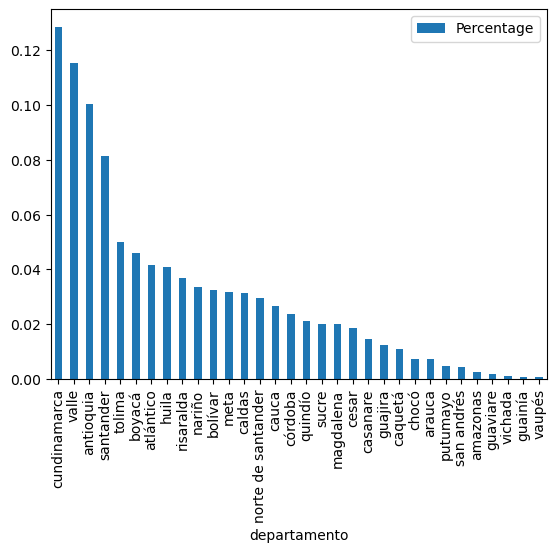

In [106]:
df_region.plot.bar(x='departamento', y='Percentage')

In [107]:
# Cluster interpretation
groups.groupby('cluster').agg(
    {
        'departamento': lambda x: x.value_counts().index[0],
        'municipio': lambda x: x.value_counts().index[0],
        'genero': lambda x: x.value_counts().index[0],
        'armas_medios': lambda x: x.value_counts().index[0],
        'grupo_etario': lambda x: x.value_counts().index[0],
        'descripción_conducta': lambda x: x.value_counts().index[0],
        'cantidad': 'mean',
    }
).reset_index()

,cluster,departamento,municipio,genero,armas_medios,grupo_etario,descripción_conducta,cantidad
0,0,cundinamarca,bogotá d.c. (ct),masculino,contundentes,adultos,lesiones personales,1.417911
1,1,cundinamarca,bogotá d.c. (ct),no reporta,contundentes,no reporta,lesiones personales,1.492950
2,2,valle,cali (ct),masculino,vehiculo,adultos,lesiones culposas,1.506656
3,3,cundinamarca,bogotá d.c. (ct),masculino,contundentes,adultos,lesiones personales,17.727711
4,4,cundinamarca,bogotá d.c. (ct),femenino,contundentes,adultos,lesiones personales,1.425045
